<a href="https://colab.research.google.com/github/Ganpat9829/Handwritten-digits-classification/blob/main/Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten digits classification using neural network**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

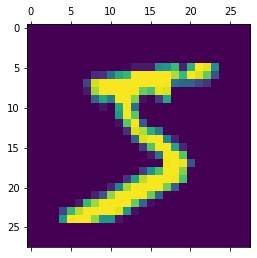

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9791


[0.07316157221794128, 0.9790999889373779]

# **Analyzing Results**

Text(69.0, 0.5, 'Truth')

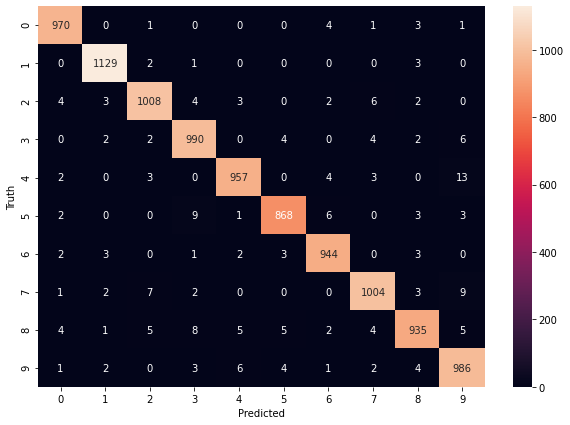

In [14]:
import seaborn as sn
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labaels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Handwritten digits classification using CNN**

In [45]:
X_train_CNN = X_train.reshape(-1,28,28,1)
X_train_CNN.shape

(60000, 28, 28, 1)

In [46]:
X_test_CNN = X_test.reshape(-1,28,28,1)
X_test_CNN.shape

(10000, 28, 28, 1)

In [47]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(X_train_CNN, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1658 - accuracy: 0.9511
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0574 - accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0386 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0175 - accuracy: 0.9945


In [49]:
model.evaluate(X_test_CNN,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0465 - accuracy: 0.9852


[0.0465252660214901, 0.9851999878883362]

# **Analyzing Results**

In [50]:
import sklearn.metrics as metrics
y_pred_ohe = model.predict(X_test_CNN)
y_pred_labels = [np.argmax(i) for i in y_pred_ohe]
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_labels) 

Text(69.0, 0.5, 'Truth')

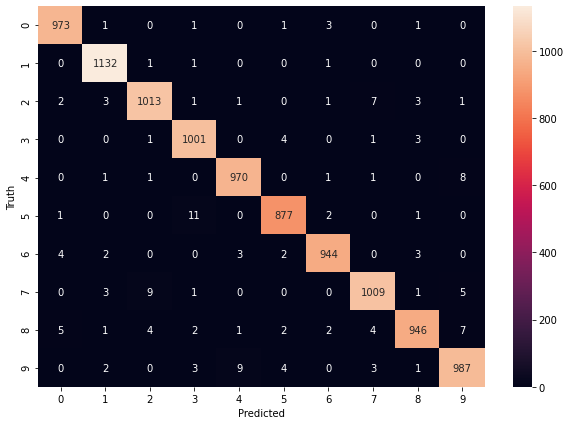

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')